In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('smartphone_cleaned_v2.csv')

In [3]:
df.shape

(980, 24)

In [4]:
df.head()

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_name,processor_brand,num_cores,...,internal_memory,screen_size,refresh_rate,resolution,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory
0,oneplus,OnePlus 11 5G,54999,89.0,True,True,False,Snapdragon 8 Gen2,snapdragon,Octa Core,...,256.0,6.70,120,1440 x 3216,3,1,android,50.0,16,0
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,True,False,False,Snapdragon 695,snapdragon,Octa Core,...,128.0,6.59,120,1080 x 2412,3,1,android,64.0,16,1 TB
2,samsung,Samsung Galaxy A14 5G,16499,75.0,True,False,False,Exynos 1330,exynos,Octa Core,...,64.0,6.60,90,1080 x 2408,3,1,android,50.0,13,1 TB
3,motorola,Motorola Moto G62 5G,14999,81.0,True,False,False,Snapdragon 695,snapdragon,Octa Core,...,128.0,6.55,120,1080 x 2400,3,1,android,50.0,16,1 TB
4,realme,Realme 10 Pro Plus,24999,82.0,True,False,False,Dimensity 1080,dimensity,Octa Core,...,128.0,6.70,120,1080 x 2412,3,1,android,108.0,16,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   brand_name            980 non-null    object 
 1   model                 980 non-null    object 
 2   price                 980 non-null    int64  
 3   rating                879 non-null    float64
 4   has_5g                980 non-null    bool   
 5   has_nfc               980 non-null    bool   
 6   has_ir_blaster        980 non-null    bool   
 7   processor_name        960 non-null    object 
 8   processor_brand       960 non-null    object 
 9   num_cores             974 non-null    object 
 10  processor_speed       938 non-null    float64
 11  battery_capacity      969 non-null    float64
 12  fast_charging         980 non-null    int64  
 13  ram_capacity          980 non-null    float64
 14  internal_memory       978 non-null    float64
 15  screen_size           9

In [6]:
df.isnull().sum()

brand_name                0
model                     0
price                     0
rating                  101
has_5g                    0
has_nfc                   0
has_ir_blaster            0
processor_name           20
processor_brand          20
num_cores                 6
processor_speed          42
battery_capacity         11
fast_charging             0
ram_capacity              0
internal_memory           2
screen_size               0
refresh_rate              0
resolution                0
num_rear_cameras          0
num_front_cameras         0
os                        0
primary_camera_rear       0
primary_camera_front      4
extended_memory           0
dtype: int64

In [7]:
# brand name
df['brand_name'].value_counts()

brand_name
xiaomi       134
samsung      132
vivo         111
realme        97
oppo          88
motorola      52
apple         46
oneplus       42
poco          41
tecno         33
iqoo          32
infinix       29
huawei        16
google        14
nokia         13
honor         13
itel          10
sony           9
asus           7
nubia          6
nothing        5
lava           4
jio            4
gionee         3
micromax       3
oukitel        3
lg             3
redmi          3
letv           3
ikall          3
royole         2
doogee         2
zte            2
lenovo         2
lyf            2
sharp          1
tcl            1
cat            1
leitz          1
duoqin         1
leeco          1
blu            1
vertu          1
tesla          1
cola           1
blackview      1
Name: count, dtype: int64

<Axes: xlabel='brand_name'>

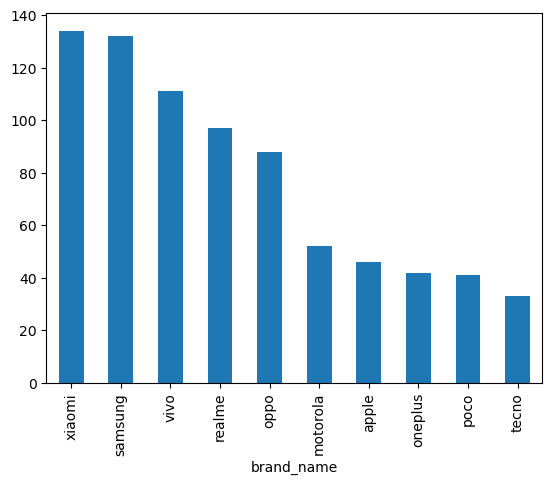

In [8]:
# top 10 phone brands
df['brand_name'].value_counts().head(10).plot(kind='bar')

In [9]:
# price col
df['price'].describe()

count       980.000000
mean      32520.504082
std       39531.812669
min        3499.000000
25%       12999.000000
50%       19994.500000
75%       35491.500000
max      650000.000000
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='Count'>

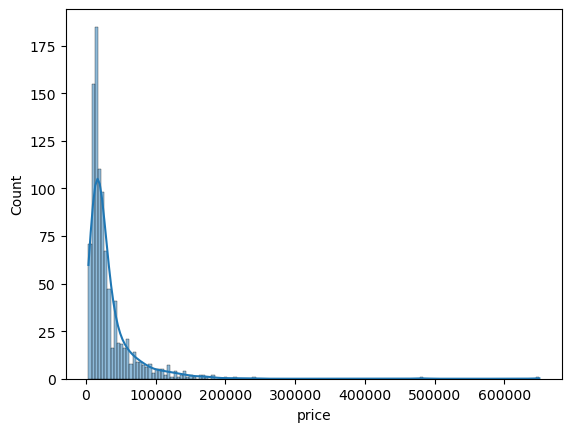

In [10]:
sns.histplot(df['price'],kde=True)

In [11]:
df['price'].skew()

6.591790999665567

<Axes: >

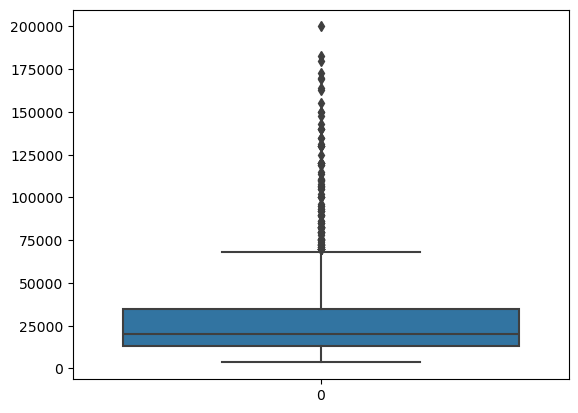

In [12]:
sns.boxplot(df[df['price']<200000]['price'])

In [13]:
df[df['price']>200000]

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_name,processor_brand,num_cores,...,internal_memory,screen_size,refresh_rate,resolution,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory
427,vertu,Vertu Signature Touch,650000,62.0,False,True,False,Snapdragon 801,snapdragon,Octa Core,...,64.0,4.70,60,1080 x 1920,1,1,android,13.0,2.1,0
478,huawei,Huawei Mate 50 RS Porsche Design,239999,81.0,False,True,True,Snapdragon 8+ Gen1,snapdragon,Octa Core,...,512.0,6.74,120,1212 x 2616,3,1,Hongmeng OS v3.0,50.0,13,256 GB
887,xiaomi,Xiaomi Redmi K20 Pro Signature Edition,480000,88.0,False,True,False,Snapdragon 855,snapdragon,Octa Core,...,256.0,6.39,60,1080 x 2340,3,1,android,48.0,20,0
951,huawei,Huawei Mate 30 RS Porsche Design,214990,NaN,True,True,True,Kirin 990,kirin,Octa Core,...,512.0,6.53,60,1176 x 2400,4,2,android,40.0,32,256 GB


In [14]:
df['price'].isnull().sum()

0

In [15]:
# rating col

df['rating'].describe()

count    879.000000
mean      78.258248
std        7.402854
min       60.000000
25%       74.000000
50%       80.000000
75%       84.000000
max       89.000000
Name: rating, dtype: float64

<Axes: xlabel='rating', ylabel='Count'>

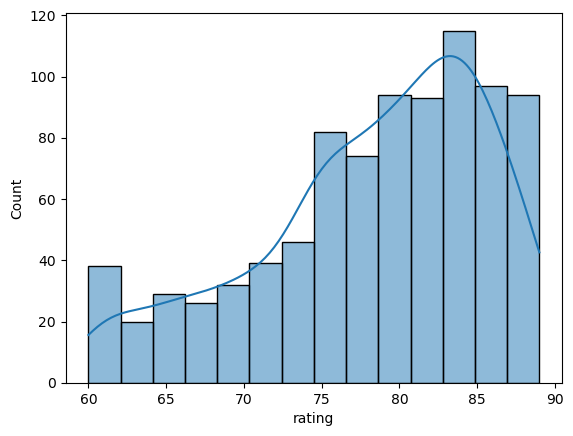

In [16]:
sns.histplot(df['rating'],kde=True)

In [17]:
df['rating'].skew()

-0.6989993034105535

<Axes: >

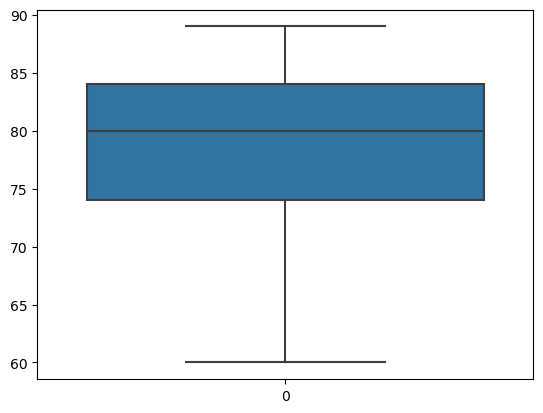

In [18]:
sns.boxplot(df['rating'])

In [19]:
df['rating'].isnull().sum()

101

<Axes: ylabel='count'>

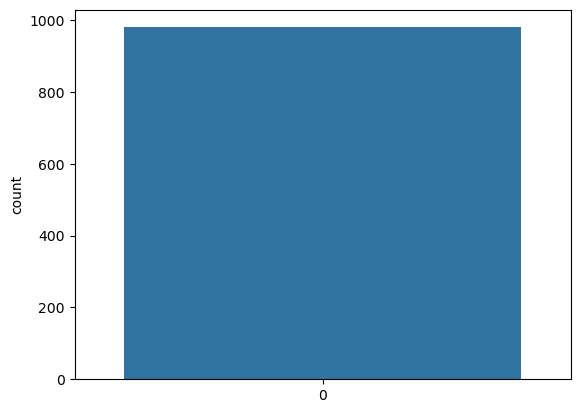

In [20]:
sns.countplot(df['has_5g'])

In [21]:
df['has_5g'].value_counts()

has_5g
True     549
False    431
Name: count, dtype: int64

<Axes: ylabel='count'>

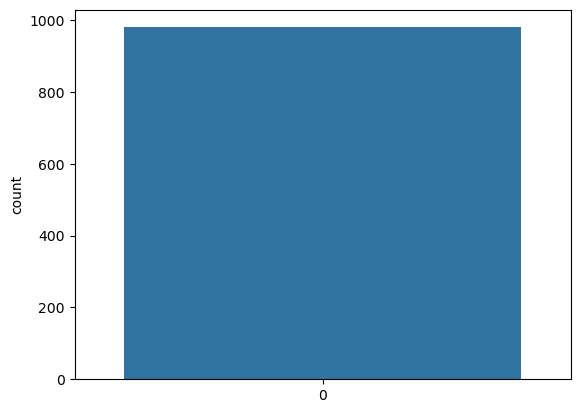

In [22]:
sns.countplot(df['has_nfc'])

In [23]:
df['has_nfc'].value_counts()

has_nfc
False    587
True     393
Name: count, dtype: int64

<Axes: ylabel='count'>

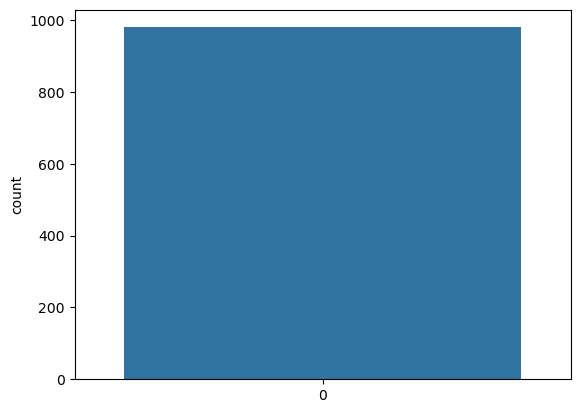

In [24]:
sns.countplot(df['has_ir_blaster'])

In [25]:
df['processor_brand'] = df['processor_brand'].str.replace('sanpdragon','snapdragon')
df['processor_brand'] = df['processor_brand'].str.replace('apple','bionic')
df['processor_brand'] = df['processor_brand'].str.replace('samsung','exynos')

In [26]:
temp_df = df[df['processor_brand'] == 'qualcomm']

In [27]:
df.loc[temp_df.index, 'processor_brand'] = 'snapdragon'

In [28]:
temp_df = df[df['processor_brand'] == 'a13']

In [29]:
df.loc[temp_df.index, 'processor_brand'] = 'bionic'

In [30]:
df['processor_brand'].value_counts()

processor_brand
snapdragon    413
helio         201
dimensity     177
exynos         50
bionic         45
unisoc         26
tiger          24
google          9
kirin           7
spreadtrum      4
sc9863a         2
fusion          1
mediatek        1
Name: count, dtype: int64

In [31]:
df[df['processor_brand'].isnull()]

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_name,processor_brand,num_cores,...,internal_memory,screen_size,refresh_rate,resolution,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory
118,tesla,Tesla Pi Phone,69999,83.0,True,True,False,NaN,NaN,Octa Core,...,512.0,6.73,165,1080 x 2448,3,1,android,50.0,32,0
143,jio,Jio Phone 3,4499,NaN,False,False,False,NaN,NaN,Quad Core,...,64.0,5.00,60,720 x 1280,1,1,android,5.0,2,128 GB
187,ikall,iKall Z19 Pro,8099,60.0,False,False,False,NaN,NaN,Quad Core,...,64.0,6.50,60,720 x 1600,1,1,android,13.0,8,128 GB
200,samsung,Samsung Galaxy A13,14450,75.0,False,False,False,NaN,NaN,Octa Core,...,64.0,6.60,60,1080 x 2408,4,1,android,50.0,8,1 TB
307,samsung,Samsung Galaxy A13 (4GB RAM + 128GB),14999,75.0,False,False,False,NaN,NaN,Octa Core,...,128.0,6.60,60,1080 x 2408,4,1,android,50.0,8,1 TB
313,itel,itel S16 Pro,6990,NaN,False,False,False,NaN,NaN,Quad Core,...,32.0,6.60,60,1600 x 720,3,1,android,8.0,8,32 GB
490,samsung,Samsung Galaxy A15,15990,63.0,False,False,False,NaN,NaN,Octa Core,...,64.0,6.50,60,720 x 1600,3,1,android,48.0,8,1 TB
523,samsung,Samsung Galaxy F14,14990,67.0,False,True,False,NaN,NaN,Octa Core,...,64.0,6.62,60,2408 x 1080,3,1,android,50.0,16,1 TB
575,samsung,Samsung Galaxy A13 (6GB RAM + 128GB),16499,78.0,False,False,False,NaN,NaN,Octa Core,...,128.0,6.60,60,1080 x 2408,4,1,android,50.0,8,1 TB
733,ikall,iKall Z19,7999,61.0,False,False,False,NaN,NaN,Quad Core,...,32.0,6.50,60,720 x 1600,1,1,android,20.0,13,128 GB


In [32]:
df['num_cores'].value_counts()

num_cores
Octa Core    899
Hexa Core     39
Quad Core     36
Name: count, dtype: int64

In [33]:
df['processor_speed'].describe()

count    938.000000
mean       2.427217
std        0.464090
min        1.200000
25%        2.050000
50%        2.300000
75%        2.840000
max        3.220000
Name: processor_speed, dtype: float64

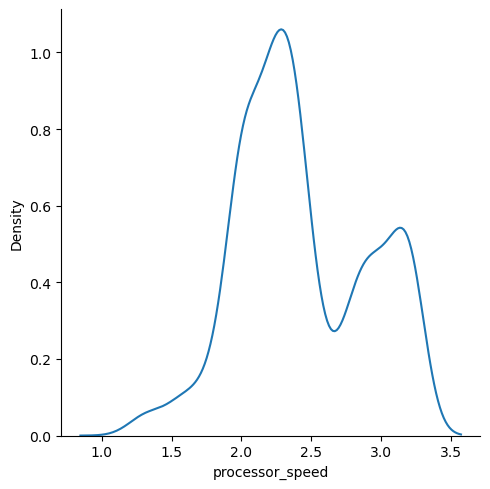

In [34]:
sns.displot(kind='kde',data=df,x='processor_speed')

In [35]:
df['processor_speed'].skew()

0.18833557463624606

In [36]:
df['processor_speed'].skew()

0.18833557463624606

In [37]:
df['battery_capacity'].describe()

count      969.000000
mean      4817.748194
std       1009.540054
min       1821.000000
25%       4500.000000
50%       5000.000000
75%       5000.000000
max      22000.000000
Name: battery_capacity, dtype: float64

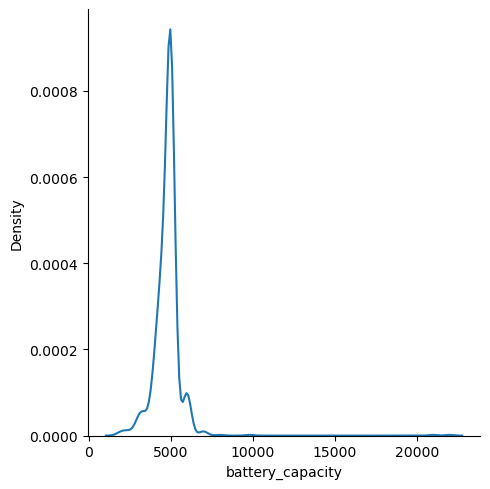

In [38]:
sns.displot(kind='kde',data=df,x='battery_capacity')

In [39]:
df[df['battery_capacity'] > 7000]

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_name,processor_brand,num_cores,...,internal_memory,screen_size,refresh_rate,resolution,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory
391,oukitel,Oukitel WP19,29990,84.0,False,True,False,Helio G95,helio,Octa Core,...,256.0,6.78,60,1080 x 2400,3,1,android,64.0,16,Not Specified
599,oukitel,Oukitel WP21,22990,82.0,False,False,False,Helio G99,helio,Octa Core,...,256.0,6.78,120,1080 x 2400,3,1,Memory Card (Hybrid),64.0,Main,0
843,doogee,Doogee V Max,45999,88.0,True,False,False,Dimensity 1080,dimensity,Octa Core,...,256.0,6.58,120,1080 x 2408,3,1,android,108.0,32,2 TB
966,oukitel,Oukitel WP9,25899,72.0,False,True,False,Helio P60,helio,Octa Core,...,128.0,5.86,60,720 x 1520,3,1,android,16.0,8,Not Specified


In [40]:
df['fast_charging'].describe()

count    980.000000
mean      36.048980
std       35.948034
min       -1.000000
25%       15.000000
50%       30.000000
75%       65.000000
max      240.000000
Name: fast_charging, dtype: float64

In [41]:
def fast(row):

  if row['fast_charging'] == -1:
    return 0
  else:
    return 1

In [42]:
df.columns

Index(['brand_name', 'model', 'price', 'rating', 'has_5g', 'has_nfc',
       'has_ir_blaster', 'processor_name', 'processor_brand', 'num_cores',
       'processor_speed', 'battery_capacity', 'fast_charging', 'ram_capacity',
       'internal_memory', 'screen_size', 'refresh_rate', 'resolution',
       'num_rear_cameras', 'num_front_cameras', 'os', 'primary_camera_rear',
       'primary_camera_front', 'extended_memory'],
      dtype='object')

In [43]:
x = df.apply(fast,axis=1)
df.insert(12,'fast_charging_available',x)

In [44]:
df['fast_charging'] = df['fast_charging'].apply(lambda x:np.nan if x == 0 or x == -1 else x)

In [45]:
df['ram_capacity'].value_counts()

ram_capacity
8.0     339
6.0     234
4.0     215
12.0     86
3.0      54
2.0      32
16.0      9
1.0       7
18.0      2
64.0      2
Name: count, dtype: int64

In [46]:
temp_df = df[df['internal_memory'].isnull()]

In [47]:
df.loc[temp_df.index,['ram_capacity','internal_memory']] = [[4,64],[4,64]]

In [48]:
df['internal_memory'].value_counts()

internal_memory
128.0     523
64.0      193
256.0     157
32.0       67
512.0      22
16.0       12
1024.0      5
8.0         1
Name: count, dtype: int64

In [49]:
df['screen_size'].describe()

count    980.000000
mean       6.536765
std        0.349162
min        3.540000
25%        6.500000
50%        6.580000
75%        6.670000
max        8.030000
Name: screen_size, dtype: float64

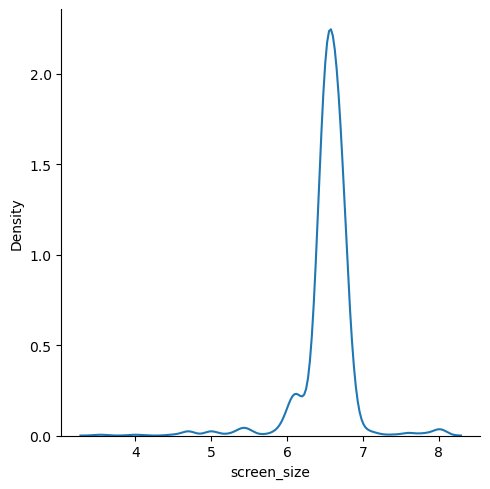

In [50]:
sns.displot(kind='kde',data=df,x='screen_size')

In [51]:
df['screen_size'].skew()

-2.11619902968816

<Axes: >

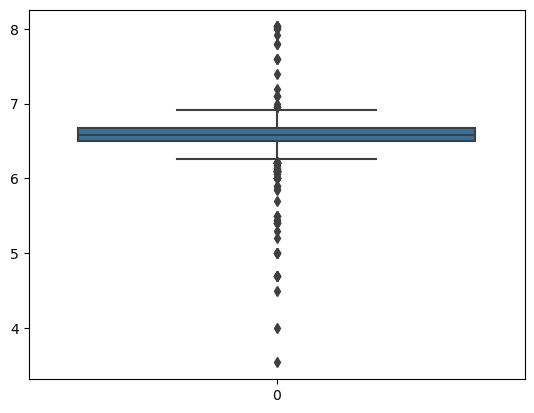

In [52]:
sns.boxplot(df['screen_size'])

In [53]:
df['extended_memory'].value_counts()

extended_memory
0                       362
1 TB                    262
512 GB                  116
256 GB                  100
Not Specified            88
Memory Card (Hybrid)     30
128 GB                    9
2 TB                      6
32 GB                     3
64 GB                     3
1000 GB                   1
Name: count, dtype: int64

In [54]:
df['extended_memory_available'] = df['extended_memory'].apply(lambda x:0 if x == '0' else 1)

In [55]:
def extended_extractor(row):

  if row['extended_memory_available'] == 0:
    return np.nan
  else:
    if row['extended_memory'] == '1 TB':
      return 1024
    elif row['extended_memory'] == '512 GB':
      return 512
    elif row['extended_memory'] == '256 GB':
      return 256
    elif row['extended_memory'] == 'Not Specified':
      return np.nan
    elif row['extended_memory'] == 'Memory Card (Hybrid)':
      return np.nan
    elif row['extended_memory'] == '128 GB':
      return 128
    elif row['extended_memory'] == '2 TB':
      return 2048
    elif row['extended_memory'] == '32 GB':
      return 32
    elif row['extended_memory'] == '64 GB':
      return 64
    elif row['extended_memory'] == '1000 GB':
      return 1000




In [56]:
def extended_extractor(row):

  if row['extended_memory_available'] == 0:
    return np.nan
  else:
    if row['extended_memory'] == 'Not Specified':
      return np.nan
    elif row['extended_memory'] == 'Memory Card (Hybrid)':
      return np.nan
    else:
      return row['extended_memory']

In [57]:
x = df.apply(extended_extractor,axis=1).str.replace('\u2009',' ').str.split(' ').str.get(0)

In [58]:
df['extended_upto'] = x

In [59]:
df['extended_upto'].value_counts()

extended_upto
1       262
512     116
256     100
128       9
2         6
32        3
64        3
1000      1
Name: count, dtype: int64

In [60]:
def transform(text):

  if text == '1':
    return '1024'
  elif text == '2':
    return '2048'
  elif text == '1000':
    return '1024'
  else:
    return text

In [61]:
df['extended_upto'] = df['extended_upto'].apply(transform)

In [62]:
def os_transform(text):

  if 'Memory' in text:
    return np.nan
  elif 'android' in text:
    return text
  elif 'ios' in text:
    return text
  else:
    return 'other'

In [63]:
df['os'] = df['os'].apply(os_transform)

In [64]:
df['extended_upto'].value_counts()

extended_upto
1024    263
512     116
256     100
128       9
2048      6
32        3
64        3
Name: count, dtype: int64

In [65]:
df.drop(columns=['processor_name','extended_memory'],inplace=True)

In [68]:
df.corr(numeric_only= True)['rating']

price                        0.283504
rating                       1.000000
has_5g                       0.596087
has_nfc                      0.474754
has_ir_blaster               0.156421
processor_speed              0.628446
battery_capacity            -0.015581
fast_charging_available      0.542814
fast_charging                0.527613
ram_capacity                 0.757613
internal_memory              0.481070
screen_size                  0.298272
refresh_rate                 0.610795
num_rear_cameras             0.515531
primary_camera_rear          0.562046
extended_memory_available   -0.415265
Name: rating, dtype: float64

In [69]:
df['primary_camera_front'].value_counts()

primary_camera_front
16      307
8       178
32      155
5       119
12       50
13       41
20       37
10       24
50       12
60       10
44        8
40        6
2         5
7         5
24        3
25        3
10.8      3
48        2
11.1      2
0.3       1
2.1       1
Main      1
10.7      1
10.1      1
12.6      1
Name: count, dtype: int64

In [70]:
df['primary_camera_front'] = df['primary_camera_front'].apply(lambda x: np.nan if x == 'Main' else x).astype(float)

In [71]:
df['num_cores'].value_counts()

num_cores
Octa Core    899
Hexa Core     39
Quad Core     36
Name: count, dtype: int64

In [72]:
df['num_cores'] = df['num_cores'].str.replace('Octa Core','8')
df['num_cores'] = df['num_cores'].str.replace('Hexa Core','6')
df['num_cores'] = df['num_cores'].str.replace('Quad Core','4')

In [75]:
df.to_csv('smartphone_cleaned_v4.csv',index=False)

In [76]:
new_df = pd.read_csv('smartphone_cleaned_v4.csv')

In [77]:
new_df[['brand_name','model','processor_brand']]

,brand_name,model,processor_brand
0,oneplus,OnePlus 11 5G,snapdragon
1,oneplus,OnePlus Nord CE 2 Lite 5G,snapdragon
2,samsung,Samsung Galaxy A14 5G,exynos
3,motorola,Motorola Moto G62 5G,snapdragon
4,realme,Realme 10 Pro Plus,dimensity
...,...,...,...
975,motorola,Motorola Moto Edge S30 Pro,snapdragon
976,honor,Honor X8 5G,snapdragon
977,poco,POCO X4 GT 5G (8GB RAM + 256GB),dimensity
978,motorola,Motorola Moto G91 5G,snapdragon


In [82]:
new_df.isnull().sum()

brand_name                     0
model                          0
price                          0
rating                       101
has_5g                         0
has_nfc                        0
has_ir_blaster                 0
processor_brand               20
num_cores                      6
processor_speed               42
battery_capacity              11
fast_charging_available        0
fast_charging                211
ram_capacity                   0
internal_memory                0
screen_size                    0
refresh_rate                   0
resolution                     0
num_rear_cameras               0
num_front_cameras              0
os                            14
primary_camera_rear            0
primary_camera_front           5
extended_memory_available      0
extended_upto                480
dtype: int64

In [83]:
new_df.to_csv('smartphone_cleaned_v5.csv',index=False)

In [84]:
new_df.select_dtypes(include=['object'])

,brand_name,model,processor_brand,resolution,num_front_cameras,os
0,oneplus,OnePlus 11 5G,snapdragon,1440 x 3216,1,android
1,oneplus,OnePlus Nord CE 2 Lite 5G,snapdragon,1080 x 2412,1,android
2,samsung,Samsung Galaxy A14 5G,exynos,1080 x 2408,1,android
3,motorola,Motorola Moto G62 5G,snapdragon,1080 x 2400,1,android
4,realme,Realme 10 Pro Plus,dimensity,1080 x 2412,1,android
...,...,...,...,...,...,...
975,motorola,Motorola Moto Edge S30 Pro,snapdragon,1080 x 2460,1,android
976,honor,Honor X8 5G,snapdragon,720 x 1600,1,android
977,poco,POCO X4 GT 5G (8GB RAM + 256GB),dimensity,1080 x 2460,1,android
978,motorola,Motorola Moto G91 5G,snapdragon,1080 x 2400,1,android


In [92]:
# from sklearn.impute import KNNImputer

# knn = KNNImputer(n_neighbors=3,weights='distance')

# return_array = knn.fit_transform(x_df)

In [93]:
# x = pd.DataFrame(return_array, columns=x_df.columns).corr()['price'].reset_index()

In [94]:
# y = new_df.corr()['price'].reset_index()

In [95]:
# x.merge(y,on='index')

In [89]:
pd.get_dummies(new_df,columns=['brand_name','processor_brand','os'],drop_first=True)

,model,price,rating,has_5g,has_nfc,has_ir_blaster,num_cores,processor_speed,battery_capacity,fast_charging_available,...,processor_brand_helio,processor_brand_kirin,processor_brand_mediatek,processor_brand_sc9863a,processor_brand_snapdragon,processor_brand_spreadtrum,processor_brand_tiger,processor_brand_unisoc,os_ios,os_other
0,OnePlus 11 5G,54999,89.0,True,True,False,8.0,3.20,5000.0,1,...,False,False,False,False,True,False,False,False,False,False
1,OnePlus Nord CE 2 Lite 5G,19989,81.0,True,False,False,8.0,2.20,5000.0,1,...,False,False,False,False,True,False,False,False,False,False
2,Samsung Galaxy A14 5G,16499,75.0,True,False,False,8.0,2.40,5000.0,1,...,False,False,False,False,False,False,False,False,False,False
3,Motorola Moto G62 5G,14999,81.0,True,False,False,8.0,2.20,5000.0,1,...,False,False,False,False,True,False,False,False,False,False
4,Realme 10 Pro Plus,24999,82.0,True,False,False,8.0,2.60,5000.0,1,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,Motorola Moto Edge S30 Pro,34990,83.0,True,False,False,8.0,3.00,5000.0,1,...,False,False,False,False,True,False,False,False,False,False
976,Honor X8 5G,14990,75.0,True,False,False,8.0,2.20,5000.0,1,...,False,False,False,False,True,False,False,False,False,False
977,POCO X4 GT 5G (8GB RAM + 256GB),28990,85.0,True,True,True,8.0,2.85,5080.0,1,...,False,False,False,False,False,False,False,False,False,False
978,Motorola Moto G91 5G,19990,80.0,True,True,False,8.0,2.20,5000.0,1,...,False,False,False,False,True,False,False,False,False,False


In [90]:
new_df['brand_name'] = new_df['brand_name'].astype('category')

In [91]:
new_df.head()

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,...,screen_size,refresh_rate,resolution,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto
0,oneplus,OnePlus 11 5G,54999,89.0,True,True,False,snapdragon,8.0,3.2,...,6.70,120,1440 x 3216,3,1,android,50.0,16.0,0,NaN
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,True,False,False,snapdragon,8.0,2.2,...,6.59,120,1080 x 2412,3,1,android,64.0,16.0,1,1024.0
2,samsung,Samsung Galaxy A14 5G,16499,75.0,True,False,False,exynos,8.0,2.4,...,6.60,90,1080 x 2408,3,1,android,50.0,13.0,1,1024.0
3,motorola,Motorola Moto G62 5G,14999,81.0,True,False,False,snapdragon,8.0,2.2,...,6.55,120,1080 x 2400,3,1,android,50.0,16.0,1,1024.0
4,realme,Realme 10 Pro Plus,24999,82.0,True,False,False,dimensity,8.0,2.6,...,6.70,120,1080 x 2412,3,1,android,108.0,16.0,0,NaN
